In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [2]:
df=pd.read_csv(r'C:\Users\Public\Datasets\news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
lemmatizer=WordNetLemmatizer()
stpwords=list(stopwords.words('english'))

In [5]:
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
def data_qualityCheck():
    print("checking the qualities...")
    df.isnull().sum()
    df.info()
    print("check finished")
data_qualityCheck()

checking the qualities...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
check finished


In [7]:
label_train=df.label

In [8]:
label_train.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [9]:
df=df.drop("label",axis=1)

In [10]:
df.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [11]:
df['text'][2168]

'Nearly simultaneous explosions targeted a Turkish peace rally Saturday in Ankara, killing at least 95 people and wounding hundreds in Turkey\'s deadliest attack in years — one that threatens to inflame the nation\'s ethnic tensions.\n\nThere was no immediate claim of responsibility but Prime Minister Ahmet Davutoglu said there were "strong signs" that the two explosions — which struck 50 meters (yards) apart just after 10 a.m. — were suicide bombings. He suggested that Kurdish rebels or Islamic State group militants were to blame.\n\nThe two explosions occurred seconds apart outside the capital\'s main train station as hundreds of opposition supporters and Kurdish activists gathered for the peace rally organized by Turkey\'s public workers\' union and other groups. The protesters planned to call for increased democracy in Turkey and an end to the renewed violence between Kurdish rebels and Turkish security forces.\n\nThe attacks Saturday came at a tense time for Turkey, a NATO member 

In [12]:
lemmatizer=WordNetLemmatizer()

In [13]:
stpwrds=list(stopwords.words('english'))

In [14]:
stpwrds


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(df['text'],label_train,test_size=0.3,random_state=1)

In [16]:
tfidf_v=TfidfVectorizer()
tfidf_X_train=tfidf_v.fit_transform(X_train)
tfidf_X_test=tfidf_v.transform(X_test)

In [17]:
tfidf_X_train.shape


(4434, 58207)

In [26]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_X_train,Y_train)
y_pred=pac.predict(tfidf_X_test)
score=accuracy_score(Y_test,y_pred)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:94.21%


In [19]:
recall=recall_score(Y_test,y_pred,pos_label="FAKE")
print(f'recall:{round(recall*100,2)}%')


recall:92.91%


In [20]:
precision=precision_score(Y_test,y_pred,pos_label='FAKE')
print(f'precision:{round(precision*100,2)}%')

precision:95.03%


In [21]:
f1score=f1_score(Y_test,y_pred,pos_label='FAKE')
print(f'f1 score:{round(f1score*100,2)}%')

f1 score:93.95%


In [22]:
def fake_news_det(news):
    input_data=[news]
    vectorized_input_data=tfidf_v.transform(input_data)
    prediction=pac.predict(vectorized_input_data)
    print(prediction)

In [23]:
fake_news_det("Davutoglu said authorities had detained at least two suspected would-be suicide bombers in the past three days in Ankara and Istanbul.")

['REAL']


In [24]:
fake_news_det("The FBI has wiretaps from the investigation of the Clinton Foundation. It’s finding new emails all the time. And Clintonworld panicked. The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire")

['FAKE']


Accuracy: 94.0%
Confusion Matrix:
[[920  67]
 [ 47 867]]


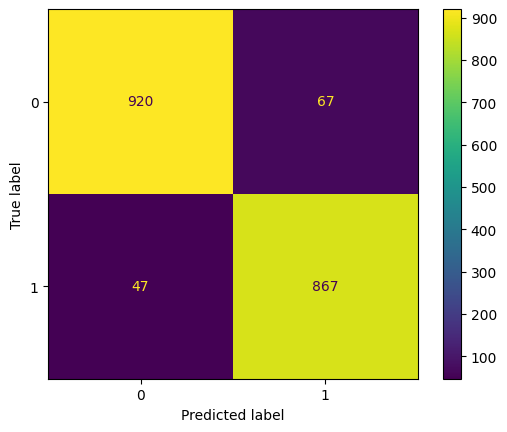

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Assuming pac has already been trained and y_pred is predicted as per your code
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_X_train, Y_train)
y_pred = pac.predict(tfidf_X_test)
score = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Optionally, display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# If you need to visualize it in a Jupyter Notebook, use the following line:
# import matplotlib.pyplot as plt
# plt.show()


Accuracy: 94.06%
Confusion Matrix:
[[921  66]
 [ 47 867]]


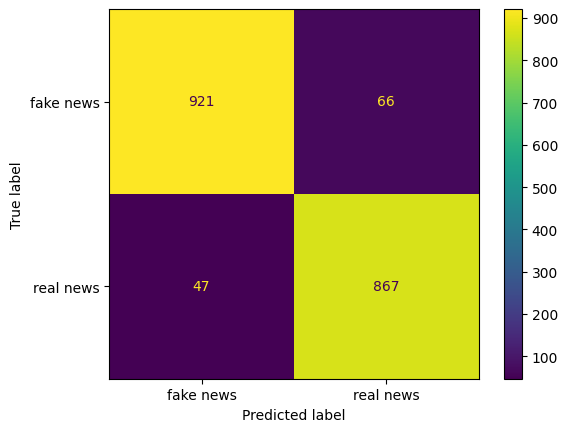

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Assuming pac has already been trained and y_pred is predicted as per your code
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_X_train, Y_train)
y_pred = pac.predict(tfidf_X_test)
score = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

# Determine the unique labels in Y_test to identify the correct label encoding
unique_labels = sorted(set(Y_test))

# Define the display labels
display_labels = ['fake news', 'real news']

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()

# If you need to visualize it in a Jupyter Notebook, use the following line:
import matplotlib.pyplot as plt
plt.show()
